In [1]:
%config IPCompleter.greedy=True

In [2]:
print(__doc__)

Automatically created module for IPython interactive environment


In [3]:
import matplotlib.pyplot as plt

In [4]:
#importar los clasificadores, metricas y datasets
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split

In [5]:
#data set de digitos
digits = datasets.load_digits()

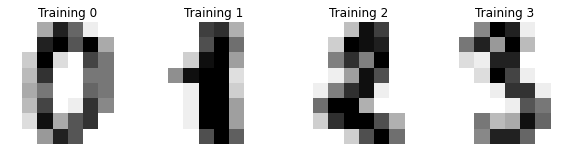

In [6]:
#### datos de entrenamiento
# extraer las configuraciones  de las axes
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10,3))
# ciclar el data set para mostrar las imagenes
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off() # borrar las lineas de las graficas
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')# asignamos los formatos de imagen
    ax.set_title('Training %i'%label)# Mostrar el titulo

Clasificacion

In [7]:
# aplanar las imagenes
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))## modela las imagenes

In [8]:
## clasificador con soporte de vectores SVC(support vector classifier)
clf = svm.SVC(gamma=0.001) # indicar valor del gamma

In [9]:
## dividir la data en 50% entrenamiento y 50% test
X_train, X_test, y_train, y_test = train_test_split(data, digits.target, test_size=0.5, shuffle=True)##revisar

In [18]:
## entrenamiento del modelo
clf.fit(X_train, y_train)

SVC(gamma=0.001)

In [19]:
## calificacion del modelo
clf.score(X_train, y_train)

0.9988864142538976

In [11]:
## guardamos la prediccion 
predicted = clf.predict(X_test)

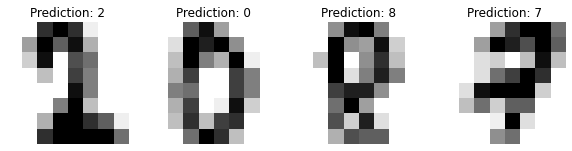

In [14]:
## mostrar las predicciones
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10,3))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()## quitar lineas
    image = image.reshape(8,8) # modificar el tamaño de la imagen
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest') # mostrar la imagen
    ax.set_title(f'Prediction: {prediction}')

In [28]:
## crear reporte mostrando las metricas de clasificacion
print(f"Clasification report for classifier {clf}:\n"
      f"{metrics.classification_report(y_test, predicted)}\n")

Clasification report for classifier SVC(gamma=0.001):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        90
           1       1.00      1.00      1.00        86
           2       1.00      1.00      1.00        86
           3       1.00      0.98      0.99        93
           4       1.00      0.98      0.99        91
           5       0.99      0.99      0.99        96
           6       1.00      1.00      1.00        90
           7       0.99      0.99      0.99        90
           8       1.00      0.98      0.99        96
           9       0.93      1.00      0.96        81

    accuracy                           0.99       899
   macro avg       0.99      0.99      0.99       899
weighted avg       0.99      0.99      0.99       899




Confusion matrix:
[[90  0  0  0  0  0  0  0  0  0]
 [ 0 86  0  0  0  0  0  0  0  0]
 [ 0  0 86  0  0  0  0  0  0  0]
 [ 0  0  0 91  0  1  0  0  0  1]
 [ 0  0  0  0 89  0  0  1  0  1]
 [ 0  0  0  0  0 95  0  0  0  1]
 [ 0  0  0  0  0  0 90  0  0  0]
 [ 0  0  0  0  0  0  0 89  0  1]
 [ 0  0  0  0  0  0  0  0 94  2]
 [ 0  0  0  0  0  0  0  0  0 81]]


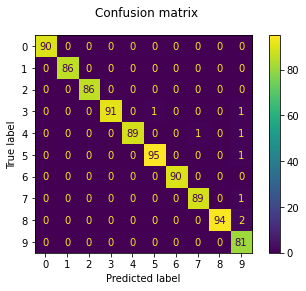

In [30]:
## matriz de confusion
disp = metrics.plot_confusion_matrix(clf, X_test, y_test)
disp.figure_.suptitle('Confusion matrix')
print(f"Confusion matrix:\n{disp.confusion_matrix}")
plt.show()